# Explaining maching learning
You can find in this notebook the exploratory data analysis done over the heart disease dataset, coupled with the simple machine learning algorithm used to predict the diseases.

## Plan
1. Introduction
  1. What are we going to explain here
  2. Why do we need to talk about AI in general
  3. What we will try to do here
2. What is a Data Scientist
3. Example dataset
  1. Explaining the dataset and the goal
  2. A few statistics/plots
  3. Predicting the heart disease
  4. Explaining results
4. Communicating results to business/boss
5. Cleaning codebase/Explaining why we would need another language
6. Conclusions, pointing to the notebook.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import sklearn

## Dataset fields description
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the 
    hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

In [2]:
heart_df = pd.read_csv("../data/processed.cleveland.data", delimiter=",",
            names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart_df = heart_df.rename(columns={"cp":"chest_pain",
                         "thalach":"max_heart_rate",
                         "oldpeak":"st_dep_induced",
                         "ca":"num_maj_ves"})
heart_df[["sex", "chest_pain", "fbs",
          "restecg", "exang", "slope",
          "num_maj_ves", "thal", "num"]] = heart_df[["sex", "chest_pain", "fbs", "restecg", "exang", "slope", "num_maj_ves", "thal", "num"]].apply(lambda x:x.astype('category'))

heart_df.head()

,age,sex,chest_pain,trestbps,chol,fbs,restecg,max_heart_rate,exang,st_dep_induced,slope,num_maj_ves,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Statistical exploratory analysis

In [3]:
heart_df.describe()

,age,trestbps,chol,max_heart_rate,st_dep_induced
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### Plotting the dataset

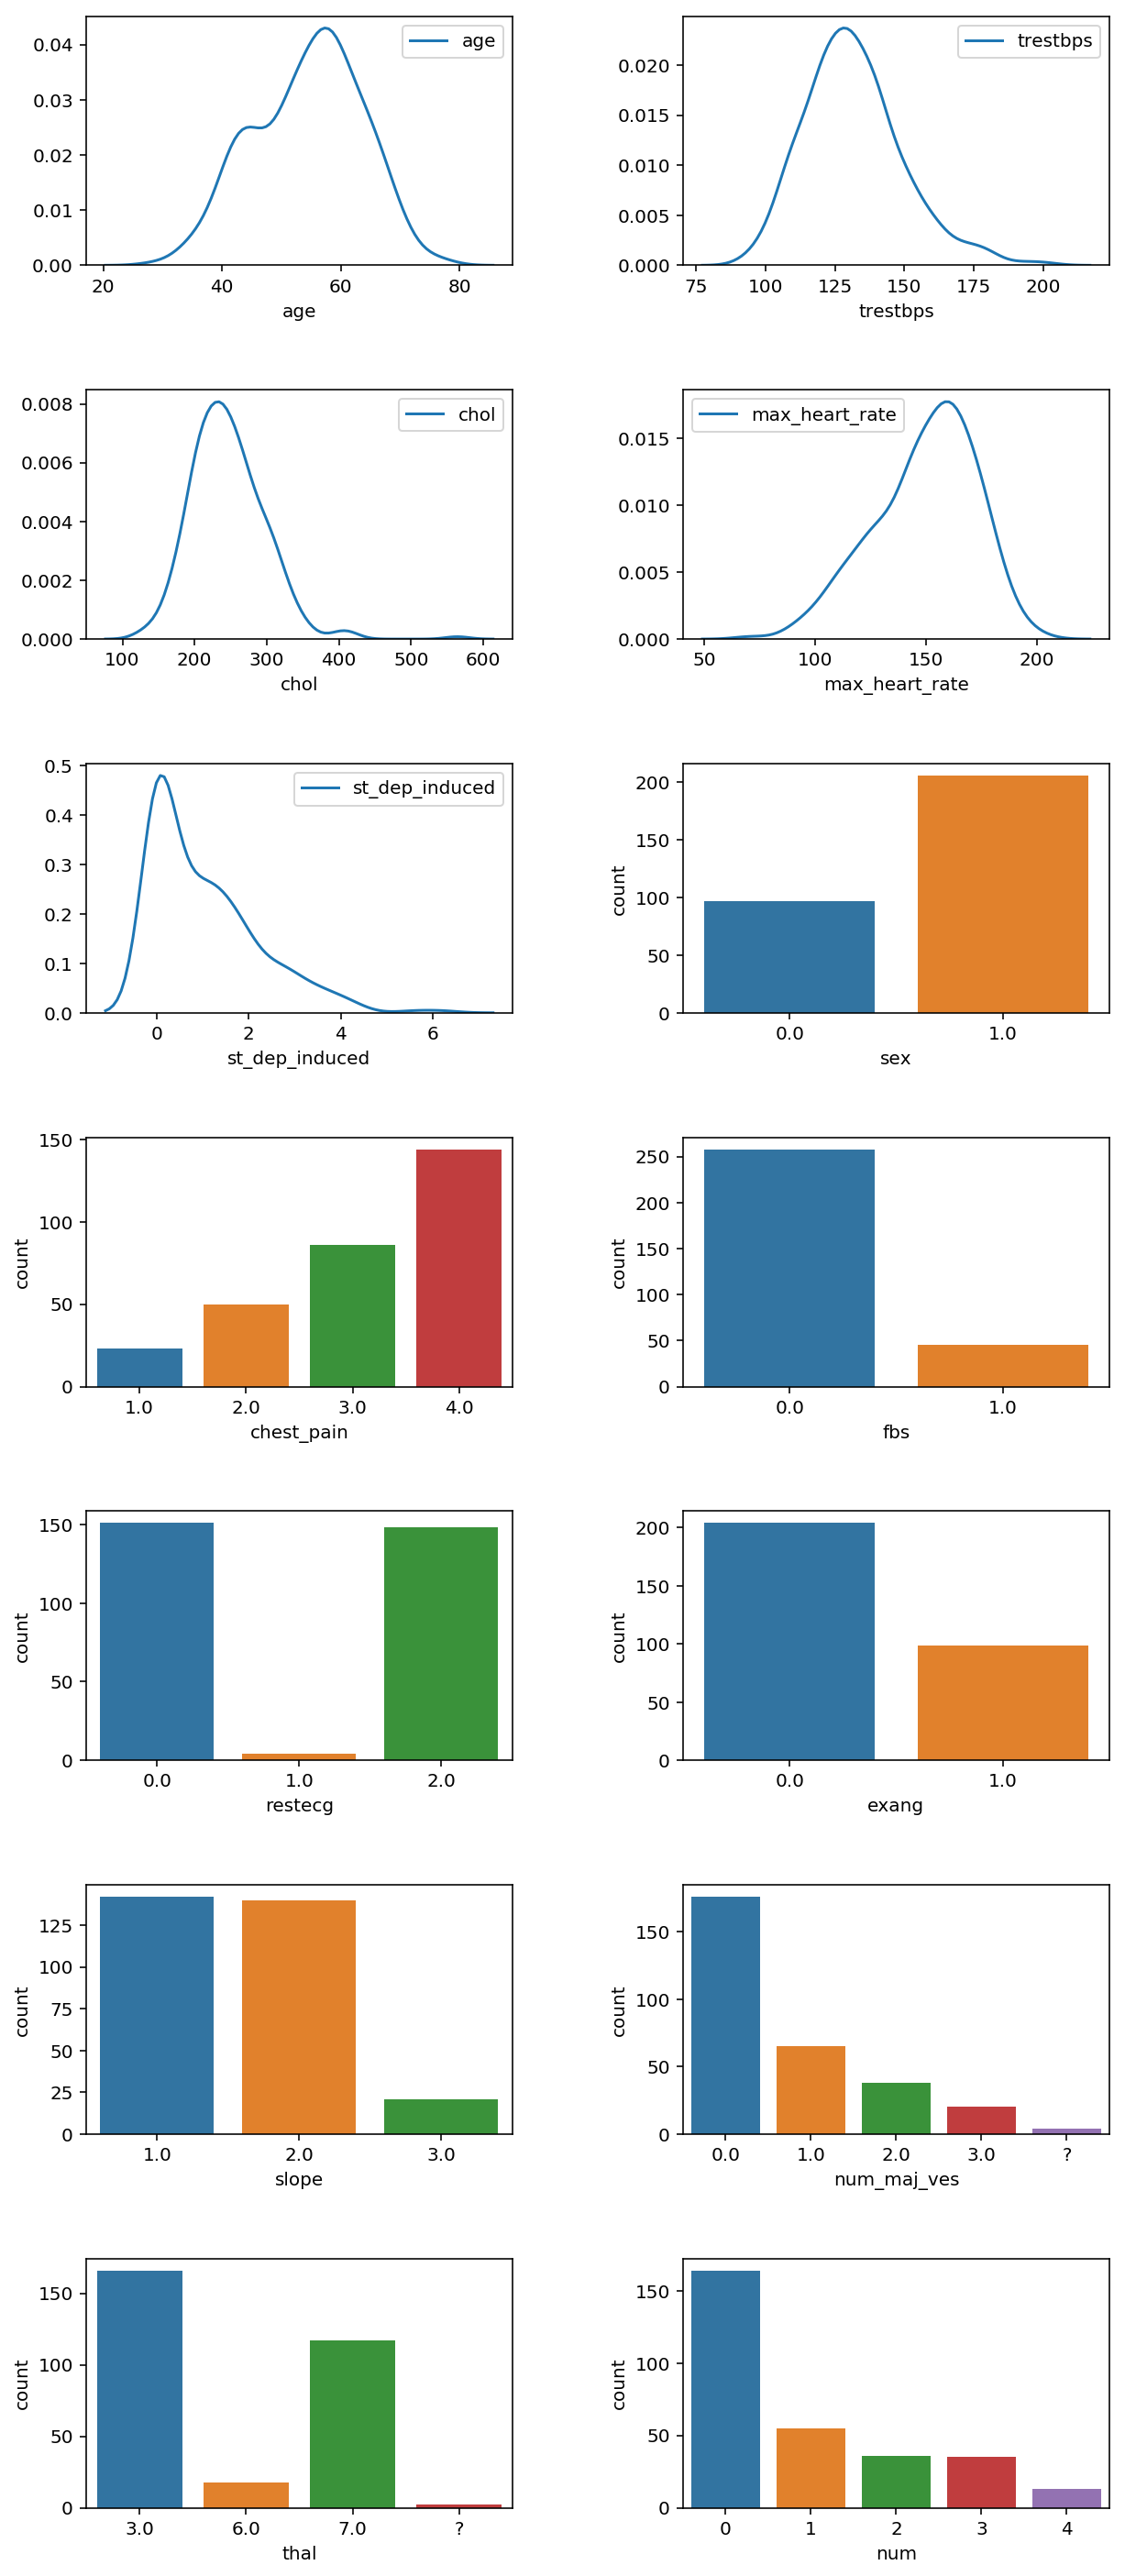

In [17]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10, 25))
ax = ax.reshape(-1)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
for i, col in enumerate(heart_df.select_dtypes(exclude="category").columns):
    sns.kdeplot(heart_df[col], ax=ax[i])
    ax[i].set_xlabel(col)
for i, col in enumerate(heart_df.select_dtypes(include="category").columns):
    i += 5
    sns.countplot(x=col, data=heart_df, ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("count")